In [1]:
#Loading data from CSV file
import pandas as pd #Importing pandas  module

Data_from_csv = pd.read_csv('data.csv')

Data_from_csv

,Unnamed: 0,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
0,2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
1,2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2,2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
3,2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
4,2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433
...,...,...,...,...,...,...,...
1090,2019-12-27,-1.520171,-1.128868,1.108275,0.936817,0.948045,11.755980
1091,2019-12-28,0.338910,-3.178251,1.484579,1.051123,1.025288,11.397092
1092,2019-12-29,0.263781,0.045725,-0.112476,0.823782,0.914111,10.918941
1093,2019-12-30,-0.425098,-1.002701,-0.834294,0.850904,0.801977,11.140722


### Contents of table:

- The above table consists of 1095 records or random variables from the range of [0:)

In [2]:
#Set Unnamed: 0 column as index column
Data_from_csv.set_index('Unnamed: 0')

,theta_1,theta_2,theta_3,theta_4,theta_5,theta_6
Unnamed: 0,,,,,,
2017-01-01,0.756936,-1.467790,0.096136,-0.115306,-0.447908,0.902579
2017-01-02,0.767089,0.185797,-1.428536,-0.086443,-0.954288,1.930909
2017-01-03,0.404544,1.415887,0.443466,0.000200,-0.892351,2.449691
2017-01-04,1.313957,-1.804471,-0.836986,0.011785,-1.012518,1.182085
2017-01-05,0.209862,1.315868,0.140993,-0.046473,-1.417092,1.742433
...,...,...,...,...,...,...
2019-12-27,-1.520171,-1.128868,1.108275,0.936817,0.948045,11.755980
2019-12-28,0.338910,-3.178251,1.484579,1.051123,1.025288,11.397092
2019-12-29,0.263781,0.045725,-0.112476,0.823782,0.914111,10.918941


- This data is a reference data loaded from csv file to perform further operations

In [3]:
#Create a Time series:

datetime_series = pd.to_datetime(Data_from_csv['Unnamed: 0'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
datetime_frame = Data_from_csv.set_index(datetime_index)


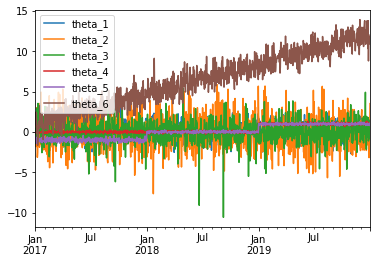

In [4]:
#Plot the values
datetime_frame.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000261B7050208>,
      dtype=object)

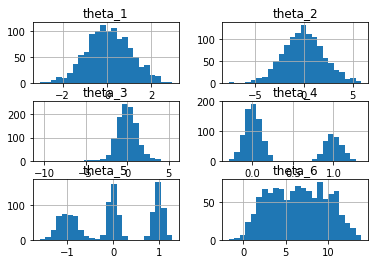

In [5]:
#Plotting histograms
datetime_frame.hist(bins=24, alpha=1)

- By adjusting the amount of bins, we can obtain the same shape, but the values will differ in terms of the amount

Typ: <class 'pandas.core.frame.DataFrame'>


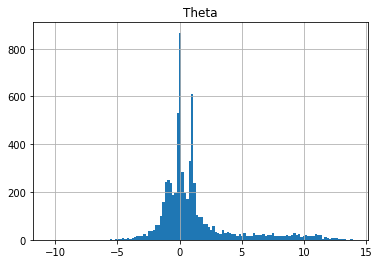

In [6]:
#Combining data:

datetime_frame_combined = pd.melt(datetime_frame, \
id_vars=['Unnamed: 0'], value_vars=['theta_1', 'theta_2', 'theta_3', 'theta_4', 'theta_5', 'theta_6'], \
value_name = "Theta", var_name = "Date time")
datetime_frame_combined.hist(bins=128, alpha=1)

print("Typ: " + str(type(datetime_frame_combined)))

- This is the histogram of all data combined.

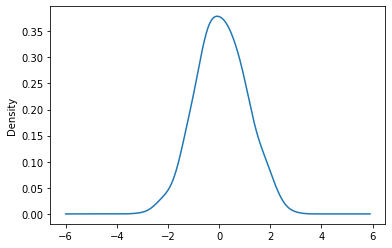

In [7]:
#Plotting Kernel Density Estimations (KDEs) for each column.

theta_1_series = pd.Series(datetime_frame['theta_1'])

ax = theta_1_series.plot.kde(bw_method=0.3) #bw_method large values may result in underfitting, small - overfitting

- The porbability density function of the $\theta_1$ data has it's peak at the value of 0.

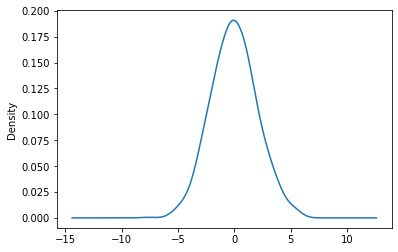

In [8]:
#Plotting Kernel Density Estimations (KDEs) for each column.

theta_2_series = pd.Series(datetime_frame['theta_2'])

ax = theta_2_series.plot.kde(bw_method=0.3) 

- The probability density function of the $\theta_2$ data has it's peak at the value of 0, but has a wider spread.

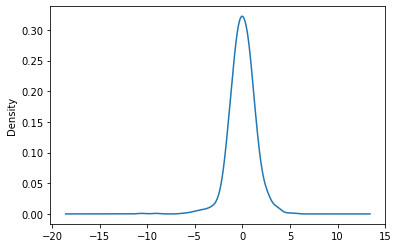

In [9]:
theta_3_series = pd.Series(datetime_frame['theta_3'])

ax1 = theta_3_series.plot.kde(bw_method=0.3) 

- The probability density function of the $\theta_3$ data has it's peak at the value of 0, but has a wider spread.

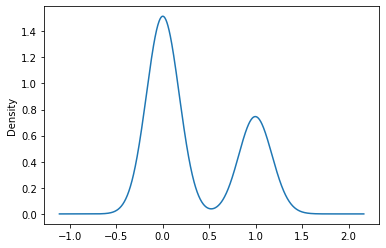

In [10]:
theta_4_series = pd.Series(datetime_frame['theta_4'])

ax2 = theta_4_series.plot.kde(bw_method=0.3) 


 - The probability density function of the $\theta_4$ data has two peaks.

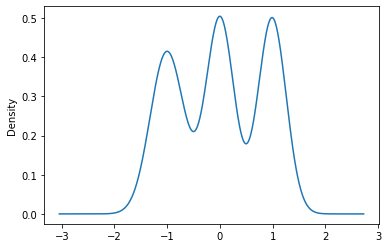

In [11]:
theta_5_series = pd.Series(datetime_frame['theta_5'])

theta_5_series.plot.kde(bw_method=0.3) 

 - The probability density function of the $\theta_5$ data has three peaks.

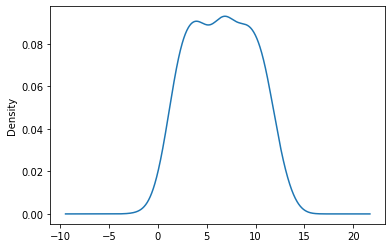

In [12]:
theta_6_series = pd.Series(datetime_frame['theta_6'])

theta_6_series.plot.kde(bw_method=0.3) 

 - The probability density function of the $\theta_6$ has no significant peak. The data is spread across the vales of 0 to 14.

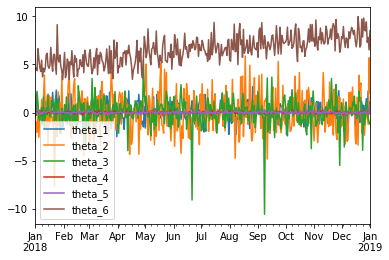

In [13]:
#using different dataframe spans
#Because we set datatime as a index, we can make simple index-like operations.
trimmed_datetime_frame = datetime_frame['2018-01-01':'2019-01-01']
trimmed_datetime_frame.plot()

- The data has been trimmed to consider only given date value from 1 year- some data have a widedly spread peads across whole dataset, but on the given year, each value of theta has a specified value.

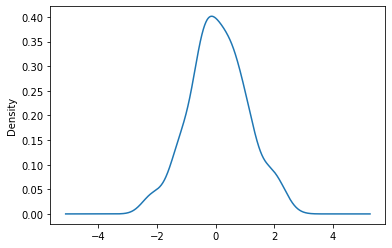

In [14]:

theta_1_series = pd.Series(trimmed_datetime_frame['theta_1'])

ax = theta_1_series.plot.kde(bw_method=0.3) #bw_method large values may result in underfitting, small - overfitting

- The density function os now less spread for first data, because of the trimming - only one peak is visible.

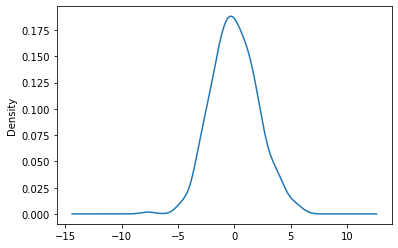

In [15]:

theta_2_series = pd.Series(trimmed_datetime_frame['theta_2'])

ax = theta_2_series.plot.kde(bw_method=0.3) #bw_method large values may result in underfitting, small - overfitting

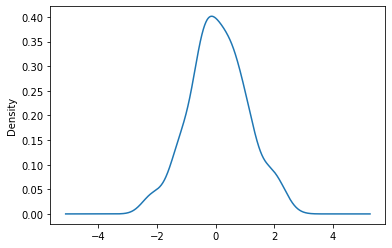

In [16]:

theta_3_series = pd.Series(trimmed_datetime_frame['theta_3'])

ax = theta_1_series.plot.kde(bw_method=0.3) #bw_method large values may result in underfitting, small - overfitting

- Kernel density depends on the considered frame during plotting - in this case, the 

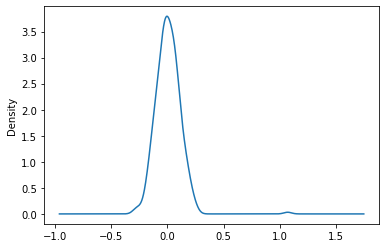

In [17]:
theta_4_series = pd.Series(trimmed_datetime_frame['theta_4'])

ax = theta_4_series.plot.kde(bw_method=0.3) #bw_method large values may result in underfitting, small - overfitting